In [9]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"
SEED = 42

In [10]:
from pykrx import stock

In [11]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

In [12]:
DATA_PATH = "/Users/idanhui/python-code/파이널 프로젝트/data/"

In [13]:
data = pd.read_csv(f"{DATA_PATH}labeled_data_final.csv")

In [14]:
def pad_str(str_list, target_len):

  padded_str_list = []
  for str in str_list:
    if len(str) < target_len:
      padded_str = "0" * (target_len - len(str)) + str
    else:
      padded_str = str
    padded_str_list.append(padded_str)
  return padded_str_list
str_list = data.Code.astype(str).to_list()
target_len = 6
padded_str_list = pad_str(str_list, target_len)

data.Code = padded_str_list

In [15]:
import datetime as dt

end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20220901 20230901


In [16]:
recommendation= data[((data['business'] == "A")|(data['business'] == "B")|(data['business'] == "C"))&
 ((data['performance'] == "A")|(data['performance'] == "B")|(data['performance'] == "A+")|(data['performance'] == "C"))&
  ((data['volitality'] == "A")|(data['volitality'] == "B")|(data['volitality'] == "A+")|(data['volitality'] == "C"))]
recommendation

,Code,Name,Market,recommendationKey,sharesOutstanding,averageVolume10days,averageVolume,heldPercentInstitutions,shortRatio,sharesPercentSharesOut,...,5년평균dividendYield,EBITDAPS,동종업계_대비_PER,dividend,growth,value,business,finance,performance,volitality
0,005930,삼성전자,KOSPI,4.0,5.969780e+09,15819172.0,13878613.0,0.47631,4.28,0.000124,...,2.870,12143.0,-1.04,C,C,D,B,F,A+,C
2,000660,SK하이닉스,KOSPI,4.0,7.082170e+08,4628225.0,3960678.0,0.40008,2.00,0.000072,...,1.462,28792.0,26.96,D,C,C,C,H,A,B
4,005490,POSCO홀딩스,KOSPI,3.9,7.587620e+07,2944335.0,1697713.0,0.30222,8.45,0.001327,...,4.364,99067.0,8.11,B,C,D,B,G,B,B
5,051910,LG화학,KOSPI,4.0,7.059230e+07,399881.0,287432.0,0.36433,6.50,0.000188,...,1.438,81652.0,14.63,D,C,D,B,G,B,C
7,005380,현대차,KOSPI,4.0,2.028760e+08,699789.0,594572.0,0.22792,4.89,0.000088,...,3.058,53685.0,-2.62,C,B,E,C,B,A,C
10,000270,기아,KOSPI,4.0,3.950820e+08,1446978.0,1229388.0,0.27907,17.01,0.000407,...,3.284,23820.0,-3.41,C,B,E,B,G,A,C
18,066570,LG전자,KOSPI,4.0,1.628850e+08,1065618.0,825302.0,0.26213,11.11,0.000518,...,0.912,36144.0,6.18,E,C,D,C,F,A,C
39,011200,HMM,KOSPI,3.2,4.890390e+08,1838939.0,2279608.0,0.30701,7.00,0.000117,...,3.430,22066.0,-1.80,C,C,E,A,H,A,A
58,011070,LG이노텍,KOSPI,4.0,2.366450e+07,235885.0,179614.0,0.28444,6.32,0.000281,...,0.680,91158.0,-3.29,E,C,E,B,H,B,C
109,039490,키움증권,KOSPI,4.0,2.481950e+07,106650.0,70016.0,0.31125,3.37,0.000165,...,1.676,161107.0,-0.58,D,B,E,A,F,B,C


In [17]:
stocks = recommendation["Name"].to_list()

In [18]:
def get_ohlcv(data,start,end):
    tmp = pd.DataFrame()
    for n in stocks:
        tmp[n] = stock.get_market_ohlcv(start, end, data[data['Name'] == n]['Code'])['종가']
    return tmp

In [19]:
tmp = get_ohlcv(data,start,end)
tmp

,삼성전자,SK하이닉스,POSCO홀딩스,LG화학,현대차,기아,LG전자,HMM,LG이노텍,키움증권,효성첨단소재,두산,효성티앤씨
날짜,,,,,,,,,,,,,
2022-09-01,58400,92400,253000,623000,195500,80200,97700,21600,336000,81900,424500,78700,306500
2022-09-02,57500,91700,246000,610000,196500,80800,97300,21350,345500,81600,419000,78000,304000
2022-09-05,57100,91100,252500,616000,200000,81000,97200,20600,338000,82400,408000,76900,300000
2022-09-06,57100,91800,252500,619000,201000,81400,96800,20400,336000,81900,429500,76200,304500
2022-09-07,56000,90400,246000,623000,202000,82300,94400,19650,332000,79800,422500,72600,300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,66800,115900,593000,563000,185400,78300,99600,17150,257000,101200,436000,115800,325000
2023-08-29,66800,118600,583000,560000,186700,80200,99600,17500,264500,102300,444500,114100,324500
2023-08-30,67100,119400,580000,576000,187800,80400,100100,17030,268000,102700,447000,113500,326500


In [20]:
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1

daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]

In [22]:
tmp2 = pd.DataFrame((annual_ret-0.02)/daily_ret.std()*np.sqrt(252),columns= ['Shape']).sort_values(by='Shape',ascending=False)
stocks = list(tmp2.iloc[0:5].index)# 상위 5개 선정
daily_ret = tmp[stocks].pct_change()
annual_ret = (1+daily_ret.mean())**tmp[stocks].shape[0]-1
daily_cov = daily_ret.cov()
annual_cov = daily_cov * tmp[stocks].shape[0]
# 개별 shape 말고 고객에게 제시하는 주식 중 고객이 선택한 주식과 상관계수가 낮은 기업으로 포트폴리오를 구성해주는 것은 어떨까?

In [24]:
def get_portfolio(stocks,annual_ret,annual_cov):
  port_ret = []
  port_risk = []
  port_weights = []
  shape_ratio = []
  rf = 0.0325

  for i in range(30000):

      weights = np.random.random(len(stocks))
      weights /= np.sum(weights)


      returns = np.dot(weights, annual_ret)


      risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

      port_ret.append(returns)
      port_risk.append(risk)
      port_weights.append(weights)
      shape_ratio.append(returns/risk)

  portfolio = {'Returns' : port_ret, 'Risk' : port_risk, 'Shape' : shape_ratio}
  for j, s in enumerate(stocks):
      portfolio[s] = [weight[j] for weight in port_weights]

  df = pd.DataFrame(portfolio)

  max_shape = df.loc[df['Shape'] == df['Shape'].max()]
  min_risk = df.loc[df['Risk'] == df['Risk'].min()]
  tmp2 = df.groupby('Risk')[['Returns']].max().reset_index()

  best_ret = tmp2.loc[0,'Returns']
  for i in range(tmp2.shape[0]):
    if tmp2.loc[i,'Returns']<best_ret:
      tmp2.drop(index=i,inplace=True)
    else:
      best_ret = tmp2.loc[i,'Returns']
  return max_shape,min_risk,tmp2,df

In [25]:
max_shape,min_risk,tmp2,df = get_portfolio(stocks,annual_ret,annual_cov)

In [26]:
# def show_CAPM(df,tmp2,max_shape,min_risk,rf=0.035):
#     import plotly.graph_objects as go


#     fig = go.Figure()


#     fig.add_trace(go.Scatter(x=df['Risk'], y=df['Returns'], mode='markers',name='Portfolio',marker=dict(
#         size=5,    # 점 크기
#         color=df['Shape'],
#         colorscale = 'earth',
#         showscale=True,  # colorscales 보여줌
#         colorbar={"title": "Shape"},
#         line_width=1, # 마커 라인 두께 설정
#     )))


#     fig.add_trace(go.Scatter(x=tmp2['Risk'], y=tmp2['Returns'],name='Efficient Frontier',line_width=5,mode='lines'))

#     fig.add_trace(go.Scatter(x=max_shape['Risk'],y=max_shape['Returns'], mode='markers',name='Max_Shape',marker=dict(size =20,symbol='star')))
#     fig.add_trace(go.Scatter(x=min_risk['Risk'],y=min_risk['Returns'], mode='markers',name='Min_risk',marker=dict(size =20,symbol='star')))

#     fig.add_trace(go.Scatter(x=[0,max_shape['Risk'].iloc[0],0.5], y=[rf,max_shape['Returns'].iloc[0],(max_shape['Returns'].iloc[0] - rf)/max_shape['Risk'].iloc[0]*0.5+rf],name='New EF',line_width=5,mode='lines'))

#     fig.update_layout(title='Efficient Frontier Graph',
#                     xaxis_title='Risk',
#                     yaxis_title='Expected Return')

#     fig.update_layout(legend=dict(
#     orientation="h",
#     yanchor="bottom",
#     y=1.02,
#     xanchor="left",
#     x=0.05
#     ))
#     fig.show()

In [59]:
def show_CAPM(df, tmp2, max_shape, min_risk, rf=0.035):
    df.plot.scatter(x='Risk', y='Returns', c='Shape', cmap='viridis', edgecolors='k', figsize=(10,8), grid=True)
    plt.plot(tmp2['Risk'], tmp2['Returns'], label='Efficient Frontier', linewidth=5,color='red')
    plt.scatter(max_shape['Risk'], max_shape['Returns'], label='Max_Shape', marker='*',s=500)
    plt.scatter(min_risk['Risk'], min_risk['Returns'], label='Min_risk', marker='*', s=500)
    plt.plot([0, max_shape['Risk'].iloc[0], 0.5], [rf, max_shape['Returns'].iloc[0], (max_shape['Returns'].iloc[0] - rf) / max_shape['Risk'].iloc[0] * 0.5 + rf], label='New EF', linewidth=2,color='green')
    plt.xlabel('Risk')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier Graph')
    plt.legend()
    plt.show()

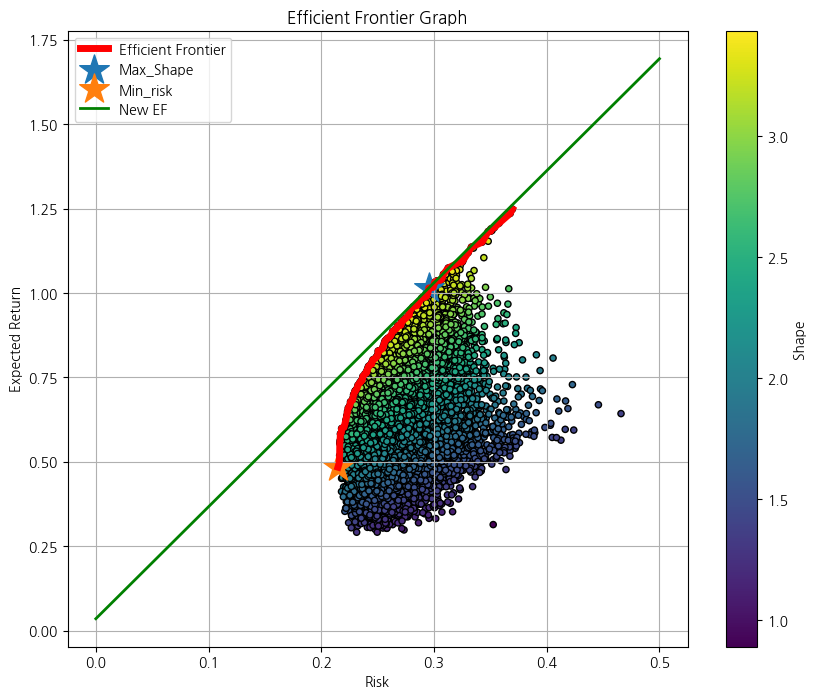

In [60]:
show_CAPM(df,tmp2,max_shape,min_risk,rf=0.035)

In [117]:
def get_bond_ratio():
    import sympy
    exp_ret = float(input("원하는 기대수익률은 얼마인가?"))/100
    w = sympy.Symbol('w')

    equation = w*0.02 + (1-w)*max_shape['Returns'].values[0] - exp_ret

    solution = sympy.solve(equation, w)
    solution = float(solution[0])
    if solution < 0 :
        print(f"차입 비중 : {-solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
    else : 
        print(f"채권의 비중 : {solution}")
        print(f"이 경우 Risk : {(1-solution)*max_shape['Risk'].iloc[0]}")
    return solution

In [118]:
solution = get_bond_ratio()

채권의 비중 : 0.8190489421120526
이 경우 Risk : 0.05343053119767648


In [129]:
import seaborn as sns
def show_portfolio(df, tmp2, max_shape, min_risk, rf=0.035):

    fig, axes = plt.subplots(1, 2, figsize=(24, 12))

    # 기존 포트폴리오
    axes[0].pie(df.iloc[0, -5:], labels=df.columns[-5:], autopct='%1.2f%%', textprops={'fontsize': 12})
    axes[0].set_title('기존 포트폴리오')

    # 기대수익 포트폴리오
    if solution >= 0:
        axes[1].pie(list(max_shape.values[0][-5:]* (1-float(solution))) + [float(solution)], labels=list(max_shape.columns[-5:]) + ['채권'], autopct='%1.2f%%', textprops={'fontsize': 12})
        axes[1].set_title(f'''기대수익 포트폴리오 \n자기자본의 {solution*100:0.4}%만큼 채권투자''')
    else:
        axes[1].pie([1/(1-solution),1-(1/(1-solution))] , labels=['자기자본','차입금'], autopct='%1.2f%%', textprops={'fontsize': 12})
        axes[1].set_title(f'''기대수익 포트폴리오 \n자기자본의 {-solution*100:0.4}%만큼 차입''')
    plt.show()

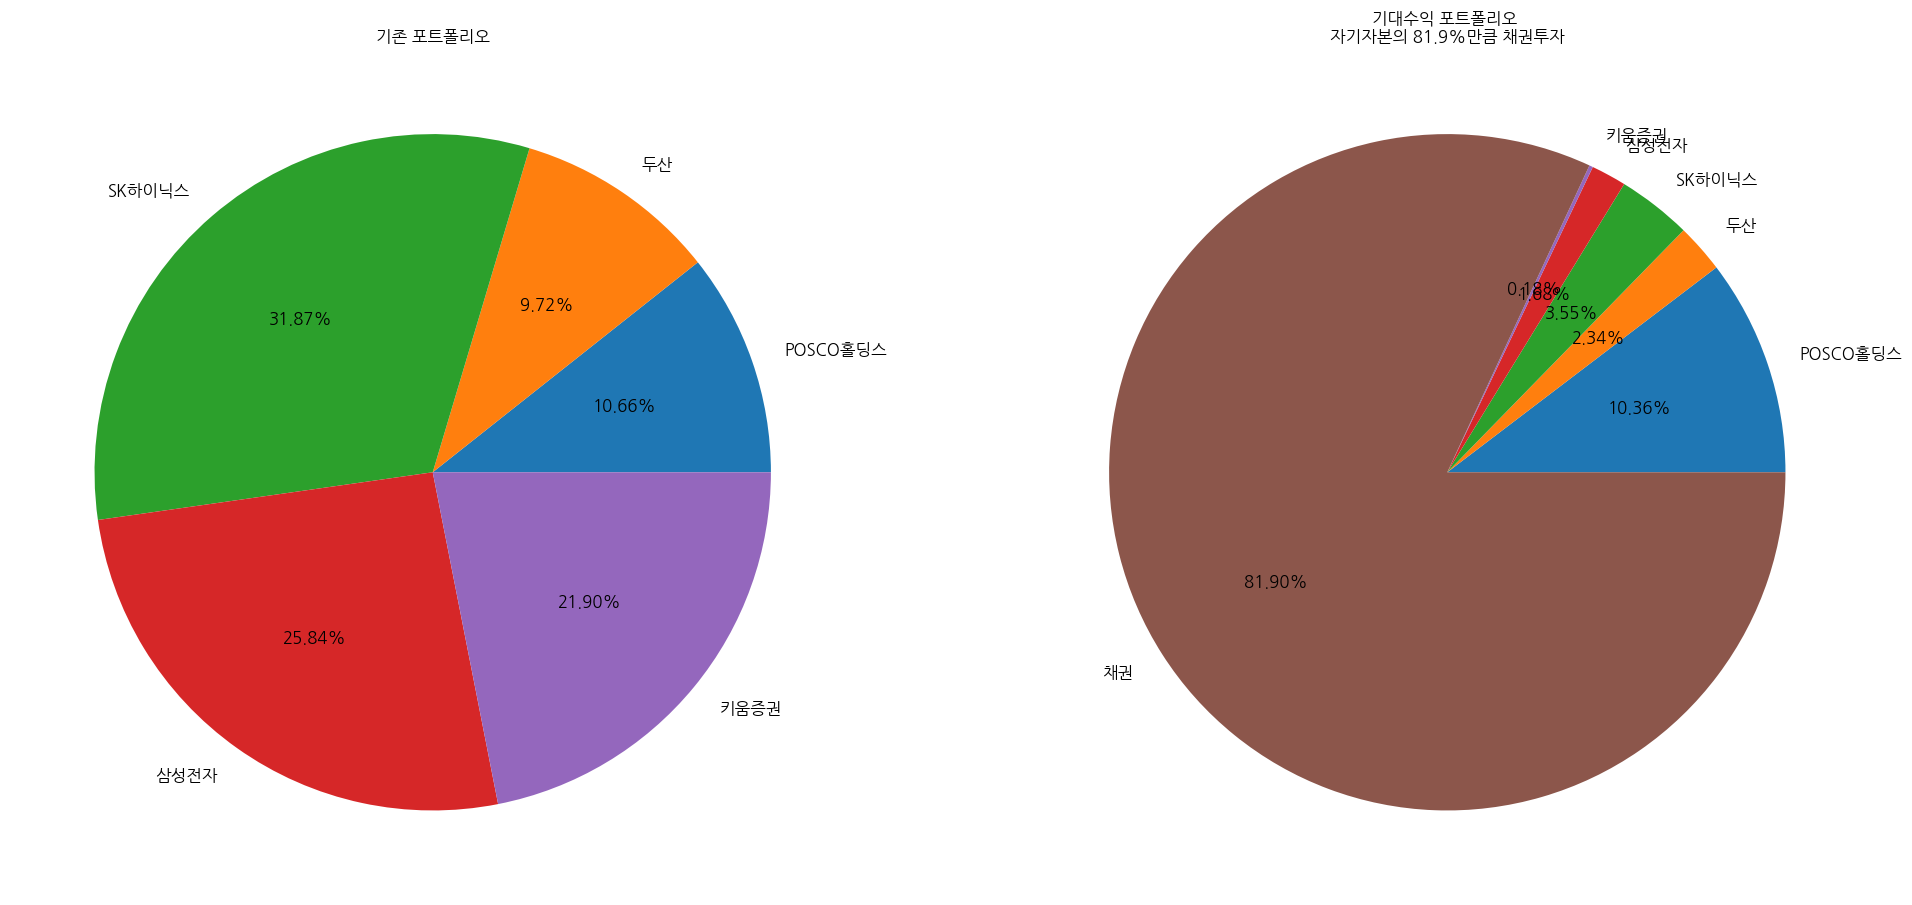

In [130]:
show_portfolio(df, tmp2, max_shape, min_risk, rf=0.0325)